In [44]:
import json
import csv
from collections import Counter
import operator
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
import wordcloud
import pandas as pd

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anveesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anveesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:

'''
f=open('ponguru_data.csv', 'r', encoding='utf-8')
l=0
for x in f :
    l+=1
    if x!=''  and l!=1:
        s=x[20:]
        s=s.split(" ")
        text=""
        for j in s :
            text+=j
            text+=" "
        twitter_data.append(text)
'''
twitter_data=[]
f=open('rajinikanth_tweets.csv', 'r')
for x in f :
    if x!=[] :
        list_of_words=x.split(',')
        if list_of_words!=['\n'] :
            twitter_data.append(list_of_words[2])

In [77]:
def worddc(x):
    tokens = []
    for i in x:
        tokens += nltk.tokenize.word_tokenize(i)
    tokens = [i.lower() for i in tokens]
    k=string.punctuation
    #k=k.replace('#','')
    #k=k.replace('@','')
    obj=str.maketrans('', '',k)
    tokens = [i.translate(obj) for i in tokens]
    k='0123456789'
    obj=str.maketrans('', '',k)
    tokens = [i.translate(obj) for i in tokens]
    
    
    stop_words = set(nltk.corpus.stopwords.words("english"))
    tokens = [i for i in tokens if i not in stop_words]
    tokens = [i for i in tokens if len(i)>2]
    c = Counter(tokens)
    word_cloud_2={}
    for i in dict(c):
        if(i!='https' and i!='com' and i!='brt' and i!='http' and i!='tcoa6lwdt1i5s'):
            if(i[:3]!='www' and (i[0] in string.ascii_lowercase)):
                if i=='bthank' :
                     word_cloud_2['thank']=dict(c)[i]
                else :
                    word_cloud_2[i]=dict(c)[i]
    
    word_cloud_2_list=sorted(word_cloud_2.items(),key=operator.itemgetter(1))
    word_cloud_2_list=word_cloud_2_list[::-1]
    print(word_cloud_2_list[:10])
    
    wc = wordcloud.WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA",width=2000,height=2000,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict(word_cloud_2_list))
    plt.figure( figsize=(20,10))
    plt.axis("off")
    plt.imshow(wc)

In [71]:

for i in range(len(twitter_data)):
    p=twitter_data[i].find('\\x')
    if(p!=-1):
        twitter_data[i]=twitter_data[i][:p]
print(twitter_data)

['text', "b'#RipVivek https://t.co/MSYVv9smsY'", "b'", "b'Wishing you the very best always and for the release of your film #99Songs dear @arrahman ji. May god bless you https://t.co/WEWc1uKbSp'", '"b\'For all the love', "b'", "b'Immensely humbled and honoured with your greetings and the most prestigious #DadasahebPhalkeAward award respected a", '"b\'My heartfelt thanks to the government of india', "b'", "b'https://t.co/NVExYcjxN9'", "b'https://t.co/bUzAYURjdv'", "b'", '"b\'Respected dear @narendramodi Ji ', '"b\'', '"b\'', "b'https://t.co/kcrG3ImCvA'", "b'", "b'#RIP Balu sir ... you have been my voice for many years ... your voice and your memories will live with me forever", '"b\'Respected dear @narendramodi ji', "b'", '"b\'', "b'Get well soon dear Balu sir https://t.co/6Gxmo0tVgS'", '"b\'', "b'#", "b'#", "b'", "b'Heartbroken ... Rest In Peace ... my dearest friend #RishiKapoor'", "b'", "b'", "b'#StayHomeStaySafe #Solidarity #Unity #IndiaFightsCoronavirus ", "b'One of the most advent

[('much', 44), ('wishes', 32), ('warm', 18), ('dear', 18), ('god', 15), ('bless', 14), ('bmy', 13), ('thanks', 11), ('respected', 10), ('bhttps', 9)]


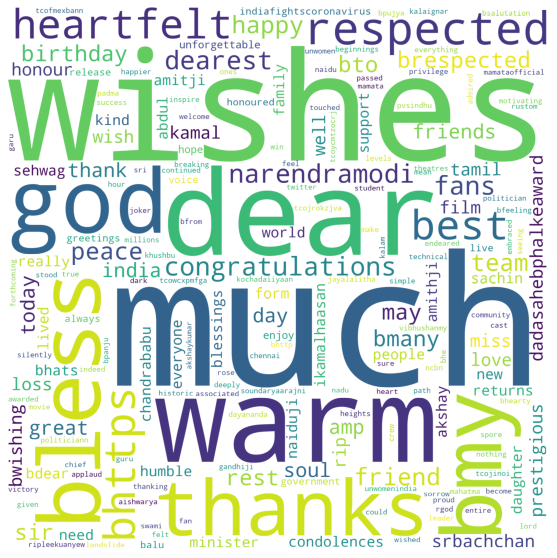

In [78]:
worddc(twitter_data)